<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M6_Building_PoC_with_DB_backend_SQLite_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this part, we will learn:
> 1. How to load a CSV file into a SQLite database 
> 2. How to run four main SQL commands
> 3. Utilizing this database for machine learning projects

We will be using Python and the SQLite module to perform this task. Finally, we will create an exercise in Google Colab to practice the concepts learned.



In [ ]:
# Read the CSV file into a Pandas DataFrame
import pandas as pd

df_csv = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Restaurant_Customers.csv')

In [ ]:
df_csv.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [ ]:
df_csv.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [ ]:
df_csv.head()

,ID,First_Name,Last_Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


### Step 1: Creating a SQLite database
In a new cell, create a new SQLite database and table to store the CSV data:




In [ ]:
# Importing the necessary libraries
import sqlite3
import pandas as pd

# Create a connection to the database
conn = sqlite3.connect('example.db')

# Add a column for the sentiment labels
df_csv['salary'] = ''

### Step 2: Loading the CSV file into the SQLite table
In a new cell, load the CSV file into the SQLite table:



In [ ]:
# Load the DataFrame into the SQLite table
df_csv.to_sql('data', conn, if_exists='append', index=False)

1000

###Step 3: Running SQL commands
Now we'll run four main SQL commands: 
> - SELECT
- INSERT 
- UPDATE
- DELETE



In [ ]:
# Select all records from the 'data' table
select_query = "SELECT * FROM data limit 5;"
cursor = conn.execute(select_query)
rows = cursor.fetchall()

# Print the records
for row in rows:
    print(row)

(1, 'Joseph', 'Perkins', 'Male', 'Dynazzy', 'Community Outreach Specialist', '')
(2, 'Jennifer', 'Alvarez', 'Female', 'DabZ', 'Senior Quality Engineer', '')
(3, 'Roger', 'Black', 'Male', 'Tagfeed', 'Account Executive', '')
(4, 'Steven', 'Evans', 'Male', 'Fatz', 'Registered Nurse', '')
(5, 'Judy', 'Morrison', 'Female', 'Demivee', 'Legal Assistant', '')


In [ ]:
# Insert a new record into the 'data' table
insert_query = "INSERT INTO data (ID, First_Name, Last_Name, Gender, Company, Occupation) VALUES ('1001', 'Lasse', 'Evans', 'Male', 'AAU', 'Researcher');"
conn.execute(insert_query)
conn.commit()

# Verify the insertion
cursor = conn.execute("SELECT * FROM data WHERE First_Name = 'Lasse';")
print(cursor.fetchone())


(1001, 'Lasse', 'Evans', 'Male', 'AAU', 'Researcher', None)


In [ ]:
# Update a record in the 'data' table
update_query = "UPDATE data SET Company = 'DTU' WHERE First_Name = 'Lasse';"
conn.execute(update_query)
conn.commit()

# Verify the update
cursor = conn.execute("SELECT * FROM data WHERE First_Name = 'Lasse';")
print(cursor.fetchone())


(1001, 'Lasse', 'Evans', 'Male', 'DTU', 'Researcher', None)


In [ ]:
# Delete a record from the 'data' table
delete_query = "DELETE FROM data WHERE First_Name = 'Lasse';"
conn.execute(delete_query)
conn.commit()

# Verify the deletion
cursor = conn.execute("SELECT * FROM data WHERE First_Name = 'Lasse';")
print(cursor.fetchone())


None


### Step 4: Clean up

In a new cell, close the database connection:



In [ ]:
conn.close()

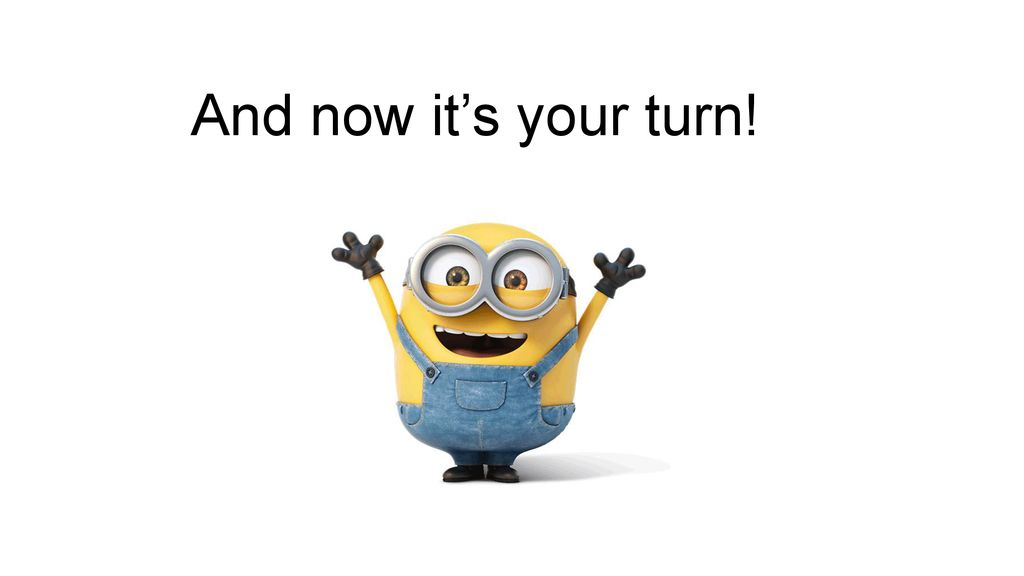

Here are exercises for each step to help reinforce your understanding of the concepts:



In [ ]:
import sqlite3
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/imdb_reviews.csv', encoding= 'unicode_escape')

### Exercise 1: Creating a SQLite database

Create a new SQLite database called "movie_reviews.db" and a column as 'sentiment' 

In [ ]:
# Create a connection to the database
conn = sqlite3.connect('movie_reviews.db')

# Add a column for the sentiment labels
df['sentiment'] = ''

In [ ]:
df.head()

,row_number,text,sentiment
0,0,Oh gosh!! I love movie sooooooooooooooooooooo ...,
1,1,I saw Borderline several years ago AMC. I've l...,
2,2,Let say GRANNY extremely well made horror viol...,
3,3,"I like Full Moon Pictures I ordered movie USA,...",
4,4,Worst horror film ever funniest film ever roll...,


### Exercise 2: Loading the CSV file into the SQLite table

Loading the CSV file into reviews table

In [ ]:
# Load the data into a table
df.to_sql('reviews', conn, if_exists='replace', index=False)

25000

### Exercise 3: Running SQL commands

Perform the following SQL commands on the "reviews" table:



SELECT: Select and display all records in the "reviews" table.


In [ ]:
# Select all records from the 'data' table
select_query = "SELECT * FROM reviews limit 5;"
cursor = conn.execute(select_query)
rows = cursor.fetchall()

# Print the records
for row in rows:
    print(row)

(0, "Oh gosh!! I love movie sooooooooooooooooooooo much!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! It incredible......I loved wee babe still love adult. It favorite Disney movie allllllllllllllllllllllllllllll time! You watch it, watch love it. My friends I watch ton.....It soooooooooooooooooooooooooooooooooo good. I recommend anyone child child heart. My favorite part song dance number strays Thomas O'Malley. The writers/producers/director completely nailed one.....yeah, nailed wall.xoxo~Wolly~xoxo", '')
(1, "I saw Borderline several years ago AMC. I've looking ever since. It haunting: visual, textural, sensual. This movie took somewhere like dream I didn't care where. I never forget curtain blowing breeze. I still remember way made tilt head. I remember facial expression I saw it. I didn't know happened movie over, I find life way. It didn't bother me. The unfairness ultimate rejection innocent character strikes sadly real. I loved faces, way camera dwelt upon them. The camera gazed set unf

INSERT: Insert a new review into the "reviews" table, with a unique row_number.

In [ ]:
# Insert a new record into the 'reviews' table
insert_query = "INSERT INTO reviews (row_number, text, sentiment) VALUES ('10001', 'That is Fantastic!', 1);"
conn.execute(insert_query)
conn.commit()

# Verify the insertion
cursor = conn.execute("SELECT * FROM reviews WHERE text = 'That is Fantastic!';")
print(cursor.fetchone())

(10001, 'That is Fantastic!', '1')


UPDATE: Update the text of the newly inserted review. 

In [ ]:
# Update a record in the 'data' table
update_query = "UPDATE reviews SET text = 'That is a really funny movie!' WHERE row_number = 10001;"
conn.execute(update_query)
conn.commit()

# Verify the update
cursor = conn.execute("SELECT * FROM reviews WHERE row_number = 10001;")
print(cursor.fetchone())

(10001, 'That is a really funny movie!', '')


DELETE: Delete the newly inserted review from the "reviews" table. 

In [ ]:
# Delete a record from the 'data' table
delete_query = "DELETE FROM reviews WHERE row_number = 10001;"
conn.execute(delete_query)
conn.commit()

# Verify the deletion
cursor = conn.execute("SELECT * FROM reviews WHERE row_number = 10001;")
print(cursor.fetchone())

None


###Exercise 4: Clean up

Close the SQLite database connection and ensure there are no errors.



In [ ]:
conn.close()

#Hands on project for using SQLite in ML

Here's a tutorial on how to use the transformers library in Python to perform sentiment analysis on movie reviews stored in a SQLite database

In [ ]:
!pip install transformers --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 12.5 MB/s eta 0:00:00


###Step 1: Load the sentiment analysis model

In [ ]:
from transformers import pipeline

# Load the pre-trained sentiment analysis model
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


###Step 2: Extract text for movie reviews
Next, we need to extract the movie reviews from our SQLite database and analyze their sentiment using the classifier pipeline.

In [ ]:
# Create a connection to the database
conn = sqlite3.connect('movie_reviews.db')

# Extract sentiment reviews for the movie reviews
reviews = conn.execute('SELECT text FROM reviews limit 10')

Once we have extracted the movie reviews, we can iterate over them using a for loop and use the classifier pipeline to analyze their sentiment. We will also update the reviews table in our database with the sentiment label.

In [ ]:
# Iterate over the movie reviews and update the sentiment label for each one
for i, row in enumerate(reviews):
    # Extract the text of the current review
    review = row[0]
    
    # Analyze the sentiment of the review using the pre-trained classifier
    sentiment = classifier(review[:512])[0]['label']
    
    # Map the sentiment label to a binary label (1 for positive, 0 for negative)
    if sentiment == 'POSITIVE':
      label = 1
    else:
      label = 0
      
    # Update the 'sentiment' column in the 'reviews' table with the binary label for the current review
    conn.execute('UPDATE reviews SET sentiment = ? WHERE rowid = ?', (label, i+1))
    
# Commit the changes to the database
conn.commit()


In [ ]:
# Define the SQL query
query = 'SELECT * FROM reviews LIMIT 10'

# Execute the query and convert the result to a DataFrame
df_q = pd.read_sql_query(query, conn)
df_q

,row_number,text,sentiment
0,0,Oh gosh!! I love movie sooooooooooooooooooooo ...,1
1,1,I saw Borderline several years ago AMC. I've l...,1
2,2,Let say GRANNY extremely well made horror viol...,1
3,3,"I like Full Moon Pictures I ordered movie USA,...",0
4,4,Worst horror film ever funniest film ever roll...,0
5,5,I first saw I teen last year Junior High. I ri...,1
6,6,Good old Jess Franco! The always-reliable choi...,0
7,7,Dogtown Z-BoysSummary: Dogtown Z-boys document...,0
8,8,"Rigoletto Verdi's masterpiece, full drama, emo...",0
9,9,I didn't high expectations Just Before Dawn. I...,1


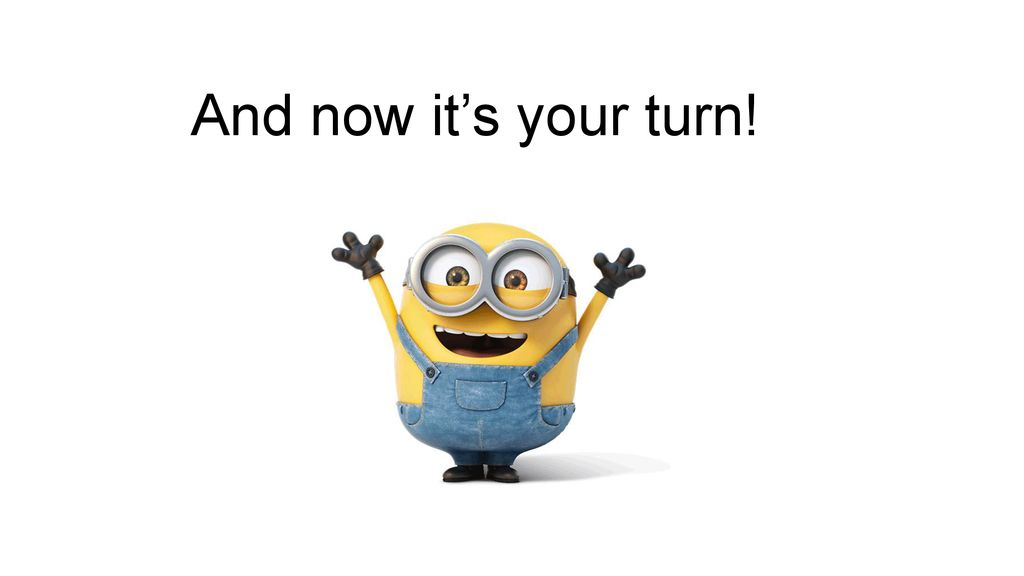

Load the data from the SQLite database and train the model based on it!

In [ ]:
from transformers import pipeline
from sklearn.metrics import accuracy_score

# Load the data from the SQLite database
X = pd.read_sql_query('SELECT text FROM reviews limit 10', conn)
y = pd.read_sql_query('SELECT sentiment FROM reviews limit 10', conn)

# Train a logistic regression model on the sentiment labels
clf = pipeline('sentiment-analysis')
y_pred = [int(result['label'] == 'POSITIVE') for result in clf(X['text'].to_list(), truncation=True)]

# Evaluate the model on the testing set
accuracy = accuracy_score(y['sentiment'].astype(int).to_list(), y_pred)
print(f'Accuracy: {accuracy:.2f}')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Accuracy: 0.90


# Develop a similar approach based on your previous project, which involves saving a CSV file in SQLite, updating the table (such as with new data), and using the updated table to train a model.

*   Step 1: Creating a SQLite database and table
*   Step 2: Loading the CSV file into the SQLite table
*   Step 3: Updating the table with new data
*   Step 4: Loading the updated table into a DataFrame
*   Step 5: Preparing the data for model training
*   Step 6: Training the model
*   Step 7: Evaluating the model